<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
def AutoRF(X, Y, X_2, Y_2,verbose_=False):
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    nestlist = []
    for i in range(100, 300, 100):
        nestlist.append(i)
    param_grid = { 
        'bootstrap': [True, False],
        'n_estimators': nestlist,
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],}

    model   = RandomForestClassifier(random_state=42)
    clf     = GridSearchCV(estimator=model, param_grid=param_grid, cv=5).fit(X, Y)
    model   = clf.best_estimator_
    results = model.fit(X, Y)
    scorerf = results.score(X_2, Y_2)
    #prediction_Y2 = results.predict(X_2)

    if verbose_==True:
        print('Parameters used')
        print("bootstrap:         {}".format(model.bootstrap))
        print("n_estimators:      {}".format(model.n_estimators))
        print("max_features:      {}".format(model.max_features))
        print("max_depth:         {}".format(model.max_depth))
        print("min_samples_leaf:  {}".format(model.min_samples_leaf))
        print("min_samples_split: {}".format(model.min_samples_split)) 
            
    return scorerf #, prediction_Y2   

In [25]:
## https://github.com/urieliram/statistical/blob/main/Tarea13.ipynb
#serie = [1,1,7,7,9,8,1,8,7,0,2,7,6,1,1,6,6,5,9,2,7,9,0,1,2,9,7,9,2,0,7,5,5,5,5,7,9
#,9,0,7,5,5,6,0,4,3,5,5,3,5,0,2,0,5,0,5,6,4,3,4,9,2,6,2,8,0,4,7,6,5,2,0,3,2
#,3,0,6,2,6,6,4,5,0,6,1,4,9,6,0,3,6,9,5,0,2,4,3,5,0,5,6,4,5,5,0,3,2,0,2,1,7
#,3,3,2,5,3,5,7,5,1,3,5,9,4,6,6,5,2,0,4,0,5,0,7,2,1,5,9,5,7,4,0,3,4,5,4,0,5
#,2,2,5,4,9,7,6,0,5,5,5,5,0,0,3,5,2,2,3,9,5,7,5,3,5,9,5,4,0,2,4,4,6,1,0,5,0
#,5,0,7,0,0,0,0,2,4,4,3,0,4,3,0,2,6,0,6,5,2,6,5,0,5,5,0,2,2,5,2,4,9,0,2,5,6
#,1,0,0,0,5,8,0,5,3,0,0,3,5,0,0,2,5,2,7,2,5,0,4,5,6,9,0,5,4,0]

serie = [1,1,7,7,9,8,1,8,7,0,2,7,6,1,1,6,6,5,9,2,7,9,0,1,2,9,7,9,2,0,7,5,5,5,5,7,
         9,9,0,7,5,5,6,0,4,3,5,5,5,5,0,2,0,5,5,5,6,4,3,4,9,2,6,2,8,0,4,7,6,5,2,0,
         3,2,0,0,6,2,6,6,4,5,0,6,1,4,9,6,0,3,6,9,5,0,2,4,3,5,0,5,6,4,5,5,0,3,2,0,
         2,1,7,3,5,2,5,3,5,6,5,1,3,5,9,4,6,6,5,2,0,4,0,5,0,7,2,1,5,9,5,7,3,0,3,4,
         5,3,0,5,2,2,5,4,9,7,6,0,5,5,5,5,0,0,3,5,2,5,3,9,5,7,5,3,5,9,5,4,0,2,4,4,
         6,1,0,5,0,5,0,7,0,0,0,0,2,4,4,3,0,4,3,0,2,6,0,6,5,2,6,5,0,5,5,0,2,2,5,2,
         4,9,0,2,5,6,1,0,0,0,5,8,0,5,3,0,0,3,5,0,0,5,5,5,7,2,5,0,4,5,6,0,0,5,4,0]


In [26]:
nodes = np.unique(serie)
n = len(nodes)
A = np.zeros(shape=(n,n))

In [27]:
for i in range(len(serie)-1):
    A[serie[i],serie[i+1]] = A[serie[i],serie[i+1]] + 1
A

array([[10.,  1.,  9.,  6.,  5., 12.,  3.,  4.,  0.,  0.],
       [ 2.,  2.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  0.],
       [ 6.,  2.,  2.,  0.,  4.,  6.,  4.,  2.,  1.,  1.],
       [ 5.,  0.,  2.,  0.,  2.,  8.,  1.,  0.,  0.,  1.],
       [ 3.,  0.,  0.,  5.,  2.,  4.,  2.,  1.,  0.,  4.],
       [13.,  1.,  7.,  5.,  3., 16.,  6.,  4.,  1.,  4.],
       [ 5.,  4.,  2.,  0.,  3.,  6.,  3.,  0.,  0.,  1.],
       [ 2.,  0.,  2.,  2.,  0.,  3.,  3.,  1.,  0.,  4.],
       [ 2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 3.,  0.,  3.,  0.,  1.,  4.,  1.,  2.,  1.,  1.]])

In [6]:
#G = nx.Graph()
G = nx.DiGraph()
G.add_nodes_from(nodes)

In [7]:
rows = A.shape[0]
cols = A.shape[1]
for i in range(0, cols - 1):
    for j in range(0, rows -1):
        if A[i,j] != 0:
            G.add_edge(i, j)
            G.edges[i, j]['color'] = "red"


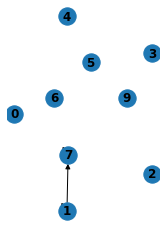

In [8]:
subax1 = plt.subplot(121)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

[Creating a graph Networkx](https://networkx.org/documentation/stable/tutorial.html)

[Drawing graphs Networkx](https://networkx.org/documentation/stable/tutorial.html#drawing-graphs)

[A study of visibility graphs for time series representations](https://upcommons.upc.edu/bitstream/handle/2117/328691/152711.pdf?sequence=1&isAllowed=y)

In [9]:
## Armamos miniseries de tamaño 'n' de atrás para adelante
mini = []
n = 10
for i in range(len(serie) - n + 1):
    aux=[]
    for j in range(n):
        aux.append(serie[i+j])
    mini.append(aux)
#print('mini',mini)

df = pd.DataFrame(mini)

X = df.loc[:,:n-2] ## Predictors
y = df.loc[:,n-1:]

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 42)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
bos = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)
bos.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1695906432748538

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
ada.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.18128654970760233

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
rf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.2046783625730994

In [13]:
#score = AutoRF(X_train,y_train,X_test,y_test,verbose_=True)
#print(score)